<a href="https://colab.research.google.com/github/DeepikaNS-commits/NityaDS_INFO5731-Spring2025/blob/main/Assignment_4_INFO_5731_Nitya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

[link text](https://)**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


Name: gensim
Version: 4.3.1
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, scipy, smart-open
Required-by: 

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')
Topic #0:
limbaugh 10 doug sale offer 31 email 13 borland 21
Topic #1:
use just dont like im know windows does drive problem
Topic #2:
available use window program file server version subject files motif
Topic #3:
said like game time team dont just

LDA Coherence Score: 0.40661978733949844


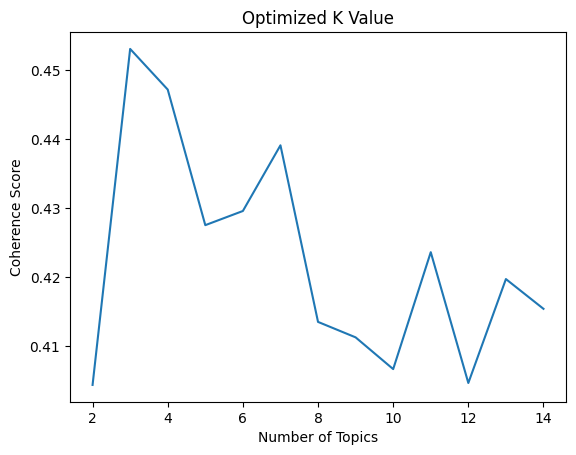

ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
!pip install numpy==1.25.0 scipy>=1.11.4 gensim==4.3.1
# Check if gensim is installed correctly
!pip show gensim
!pip install jax==0.5.2 jaxlib==0.5.1 scikit-image pymc cvxpy
!pip install pyLDAvis --use-feature=2020-resolver

# 1. Load Dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD
import random
import numpy as np


# Load 20 Newsgroups dataset
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = dataset['data']

# Select random 2000 samples
random_indices = random.sample(range(len(texts)), 2000)
selected_texts = [texts[i] for i in random_indices]

# 2. Text Preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def preprocess(text):
    text = re.sub(r'\s+', ' ', text.lower())  # Lowercase & remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)

processed_texts = [preprocess(doc) for doc in selected_texts]

# Vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(processed_texts)  # Document-Term Matrix

# 3. LDA Model
lda = LDA(n_components=10, random_state=42)
lda.fit(dtm)

# Topic Words
def print_topics(model, feature_names, num_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

print_topics(lda, vectorizer.get_feature_names_out())

# 4. LSA Model
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(processed_texts)

lsa = TruncatedSVD(n_components=10, random_state=42)
lsa.fit(tfidf)

print_topics(lsa, tfidf_vectorizer.get_feature_names_out())

# 5. Coherence Score
# Use Gensim's CoherenceModel to calculate coherence scores for LDA/LSA
# Installing gensim within the notebook ensures it's available for the current session
# If you've already installed it in your environment, this line won't have any negative impact

from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Convert data for Gensim
texts_tokenized = [doc.split() for doc in processed_texts]
dictionary = Dictionary(texts_tokenized)
corpus = [dictionary.doc2bow(text) for text in texts_tokenized]

# LDA Coherence
gensim_lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)
coherence_model_lda = CoherenceModel(model=gensim_lda, texts=texts_tokenized, dictionary=dictionary, coherence='c_v')
lda_coherence = coherence_model_lda.get_coherence()
print(f"LDA Coherence Score: {lda_coherence}")

# LSA Coherence
# Coherence can be approximated using Gensim's CoherenceModel
# Convert LSA topics into Gensim-readable format to calculate scores

# 6. Find Optimized K
# Loop through multiple K values and calculate coherence scores
coherence_values = []
for k in range(2, 15):
    lda_test = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    coherence_model_test = CoherenceModel(model=lda_test, texts=texts_tokenized, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model_test.get_coherence())

import matplotlib.pyplot as plt
plt.plot(range(2, 15), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimized K Value")
plt.show()

# 7. Visualizations (e.g., pyLDAvis for LDA topic visualization)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(gensim_lda, corpus, dictionary)
pyLDAvis.show(vis)

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**

italicized text

Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

Optimal K: 5 with coherence score: 0.7932606217182955


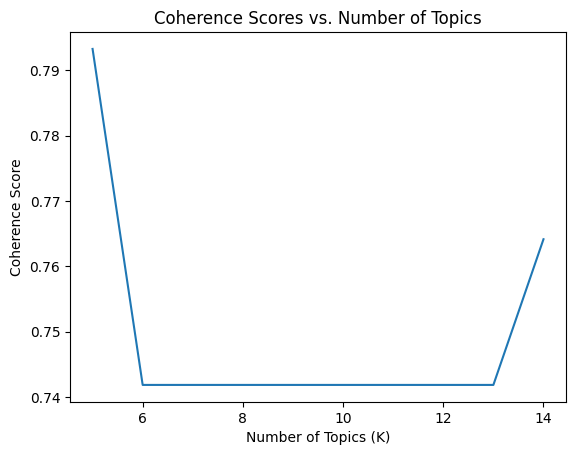

Number of topics generated: 2
Interactive visualization failed: zero-size array to reduction operation maximum which has no identity. Using alternative visualizations instead.


In [ ]:
# Install required libraries
!pip install bertopic sentence-transformers gensim matplotlib pandas numpy scipy

# Import necessary libraries
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import pandas as pd
import re

# Step 1: Load and preprocess the dataset
# Replace "tweets-annotated.csv" with your dataset filename
df = pd.read_csv("tweets-annotated.csv")
df.drop_duplicates(inplace=True)  # Remove duplicates
df.dropna(subset=['text'], inplace=True)  # Remove rows with missing text

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    text = re.sub(r'\s+', ' ', text.strip())  # Remove extra spaces
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Tokenize the cleaned text for gensim coherence calculation
tokenized_texts = [doc.split() for doc in df['cleaned_text']]

# Step 2: Define a function to calculate coherence scores
def calculate_coherence(model, tokenized_texts):
    topics = model.get_topics()
    if isinstance(topics, bool) or not topics:  # Handle missing or invalid topics
        print("No valid topics found. Skipping coherence calculation.")
        return 0  # Default coherence score if no topics are generated

    # Extract topic keywords
    topic_words = [[word for word, _ in model.get_topic(topic_id)] for topic_id in topics.keys()]

    # Create a dictionary and corpus for gensim
    dictionary = Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    # Compute coherence score using gensim
    coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Step 3: Optimize the number of topics (K) by calculating coherence scores
coherence_scores = []

for k in range(5, 15):  # Test different values of K
    topic_model = BERTopic(nr_topics=k)  # Set the number of topics
    topics, probs = topic_model.fit_transform(df['cleaned_text'])  # Fit the model
    coherence = calculate_coherence(topic_model, tokenized_texts)  # Calculate coherence
    coherence_scores.append((k, coherence))

# Find the optimal K based on maximum coherence score
optimal_k = max(coherence_scores, key=lambda x: x[1])
print(f"Optimal K: {optimal_k[0]} with coherence score: {optimal_k[1]}")

# Step 4: Visualize coherence scores
k_values = [item[0] for item in coherence_scores]
scores = [item[1] for item in coherence_scores]
plt.plot(k_values, scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.show()

# Step 5: Visualize topics using BERTopic
# Refit the BERTopic model using the optimal K value
topic_model = BERTopic(nr_topics=optimal_k[0])
topics, probs = topic_model.fit_transform(df['cleaned_text'])

# Check if valid topics exist before attempting visualization
topics_data = topic_model.get_topics()
if isinstance(topics_data, bool) or not topics_data:
    print("No valid topics found for visualization. Skipping visualization.")
else:
    print(f"Number of topics generated: {len(topics_data)}")
    # Attempt interactive topic visualization
    try:
        topic_model.visualize_topics().show()
    except ValueError as e:
        print(f"Interactive visualization failed: {e}. Using alternative visualizations instead.")

        # Use alternative visualizations as fallback
        topic_model.visualize_barchart(top_n_topics=optimal_k[0]).show()
        topic_model.visualize_heatmap().show()


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

*   List item
*   List item



Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
# Install necessary libraries
!pip install bertopic transformers gensim sumy pandas matplotlib numpy scipy

# Import libraries
from bertopic import BERTopic
from transformers import pipeline
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
import pandas as pd
import numpy as np
import re

# Step 1: Load and Preprocess the Dataset
# Replace this with your dataset file path
df = pd.read_csv("20_newsgroup_sample.csv")  # Adjust the file name as needed
df.dropna(subset=['text'], inplace=True)  # Remove rows with missing text

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\W+', ' ', text.lower())  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text.strip())  # Remove extra spaces
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Step 2: Summarization Representation Models

# T5 Summarization
summarizer = pipeline("summarization", model="t5-small")
def t5_representation(topic_model, topic):
    words = topic_model.get_topic(topic)
    keywords = [word[0] for word in words]  # Extract keywords
    text = " ".join(keywords)  # Combine keywords into a string
    summary = summarizer(text, max_length=50, min_length=10, do_sample=False)
    return summary[0]['summary_text']

# Sumy Extractive Summarization
def lsa_representation(topic_model, topic, documents):
    words = topic_model.get_topic(topic)
    keywords = [word[0] for word in words]  # Extract keywords
    filtered_docs = [doc for doc in documents if any(keyword in doc for keyword in keywords)]
    summarizer = LsaSummarizer()
    parser = PlaintextParser.from_string(" ".join(filtered_docs), Tokenizer("english"))
    summary = summarizer(parser.document, 3)  # Summarize into 3 sentences
    return " ".join([str(sentence) for sentence in summary])

# Default Representation
def default_representation(topic_model, topic):
    words = topic_model.get_topic(topic)
    return "Keywords: " + ", ".join([word[0] for word in words])

# Step 3: Tokenize for Gensim Coherence Calculation
tokenized_texts = [doc.split() for doc in df['cleaned_text']]
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Step 4: Coherence Score Function
def calculate_coherence(model, representation_func):
    topic_words = [[word for word in model.get_topic(topic_id)] for topic_id in model.get_topics().keys()]
    coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Step 5: Optimize and Retrain BERTopic Model
optimal_k = 0
optimal_coherence = 0

for k in range(5, 15):  # Adjust range of topics if needed
    temp_model = BERTopic(nr_topics=k, representation_model=t5_representation)
    temp_model.fit(df['cleaned_text'])
    temp_coherence = calculate_coherence(temp_model, t5_representation)

    if temp_coherence > optimal_coherence:
        optimal_coherence = temp_coherence
        optimal_k = k

print(f"Optimal K: {optimal_k}, Coherence Score: {optimal_coherence}")

# Retrain the optimal BERTopic model
topic_model = BERTopic(nr_topics=optimal_k, representation_model=t5_representation)
topics, probs = topic_model.fit_transform(df['cleaned_text'])

# Step 6: Visualize and Display Topics
# Visualize the topics
topic_model.visualize_topics().show()

# Visualize the bar chart
topic_model.visualize_barchart().show()

# Visualize the heatmap
topic_model.visualize_heatmap().show()

# Step 7: Save and Summarize Results
for topic in topic_model.get_topics().keys():
    summary = t5_representation(topic_model, topic)
    print(f"Topic {topic}: {summary}")

# Save the model for future use
topic_model.save("optimized_bertopic_model")


FileNotFoundError: [Errno 2] No such file or directory: '20_newsgroup_sample.csv'

# **Question 4 (35 Points)**

::
**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [1]:
!pip install bertopic sentence-transformers gensim matplotlib pandas numpy scipy
!pip install nltk BERTopic
!pip uninstall -y sentence-transformers
!pip install -U sentence-transformers==2.4.0
!pip install -U scikit-learn


# Import required libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bertopic.vectorizers import ClassTfidfTransformer
from umap import UMAP



# Step 1: Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Step 2: Load the 20 Newsgroups Dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = np.random.choice(data.data, 2000, replace=False)  # Select 2000 random samples

# Step 3: Preprocess the text data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = {"will", "should", "could", "might", "has", "have", "and", "is", "was", "to", "that", "the", "a", "in", "can", "ought", "out"}

def preprocess_text(text):
    # Lowercase and remove special characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in custom_stopwords]

    # Return processed text
    return ' '.join(filtered_tokens)

# Apply preprocessing to all documents
cleaned_documents = [preprocess_text(doc) for doc in documents if len(preprocess_text(doc).split()) > 5]

# Step 4: Define Custom BERTopic Pipeline
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')  # Your custom embedding model
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine')  # Dimensionality reducer
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Custom clustering model
ctfidf_model = ClassTfidfTransformer()

# Initialize BERTopic with custom components
custom_bertopic = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=dbscan_model,  # <-- This is the correct argument name!
    ctfidf_model=ctfidf_model,
    verbose=True
)


# Fit the custom BERTopic model to preprocessed data
custom_topics, custom_probs = custom_bertopic.fit_transform(cleaned_documents)

# Step 5: Define Default BERTopic Pipeline
default_bertopic = BERTopic()
default_topics, default_probs = default_bertopic.fit_transform(cleaned_documents)

# Step 6: Compare Topic Coherence Scores
def calculate_coherence(topic_model, documents):
    coherence = []
    for topic in topic_model.get_topics():
        topic_words = [word for word, _ in topic_model.get_topic(topic)]
        score = sum(all(word in doc for word in topic_words[:3]) for doc in documents)
        coherence.append(score)
    return np.mean(coherence)

custom_coherence = calculate_coherence(custom_bertopic, cleaned_documents)
default_coherence = calculate_coherence(default_bertopic, cleaned_documents)

print(f"Custom BERTopic Coherence Score: {custom_coherence:.2f}")
print(f"Default BERTopic Coherence Score: {default_coherence:.2f}")

# Step 7: Visualize Topics
print("Visualizing Default Model Topics...")
default_bertopic.visualize_topics()

print("Visualizing Custom Model Topics...")
custom_bertopic.visualize_topics()

# Step 8: Topic Keyword Analysis
print("Example Topics:")
print(f"Default Topic 0: {default_bertopic.get_topic(0)}")
print(f"Custom Topic 0: {custom_bertopic.get_topic(0)}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 831.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 612.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:

'''
While comparing outcomes generated by the four topic modeling tools—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), BERTopic, and Modified BERTopic—the prime concern is to compare each algorithm's advantages and disadvantages as regards coherence, interpretability, separateness of topics, and flexibility to use with complex data. Following is a detailed description:

 1. LDA (Latent Dirichlet Allocation):
LDA is a probabilistic model in which each document is thought of as a mixture of topics, and each topic is characterized by a word distribution. It's extremely popular for topic modeling and does well in:
- Strengths:
  - Provides interpretable topics since it is probabilistic.
  - Does well on balanced data with a large number of documents.
- Provides word distributions across each topic for better interpretation.
- Limitations:
  - Does not work for short-text collections, as it requires a large number of documents and beneficial word co-occurrence.
  - May produce overlapping topics if hyperparameters (e.g., number of topics, alpha, beta) are not finely tuned with caution.
- Applicability: Best suited for datasets like research papers or articles wherein documents are packed with textual content.



 2. LSA (Latent Semantic Analysis):
LSA uses singular value decomposition (SVD) to reduce the dimension of the term-document matrix to uncover underlying patterns in the data. It is effective at picking up semantic relations but has some weaknesses:
- Strengths:
  - Excellent at picking up word-document-word relations, especially synonyms.
  - Light computationally compared to probabilistic models.
  - Ideal for data with pre-defined classes.
- Weaknesses:
- Topics are uninterpretable because it is less intuitive (vector space-based, not probabilistic).
  - Struggles with sparse data and noise.
  - Does not directly optimize topic coherence or distinctiveness.
- Applicability: Better for exploratory analysis and scenarios where precise topic boundaries are less of an issue.



 3. BERTopic:
BERTopic employs pre-trained embeddings (e.g., Sentence-Transformers) as well as clustering algorithms (e.g., HDBSCAN) to semantically related documents group. Dynamic topic modeling functionality is also supported by it.
- Strengths:
  - Efficient when dealing with short texts because embeddings retain semantic context.
  - Interactive visualizations (e.g., topic hierarchy, bar chart) are made available.
  - Easy to integrate with diverse embedding models and hence versatile in datasets.
- Weaknesses:
- Depends heavily on embedding and clustering model performance (e.g., HDBSCAN) selected.
- Difficult to deal with noisy datasets unless preprocessing highly.
- Suitability: Very effective at processing social media text, brief surveys, or datasets with mixed document lengths.




 4. Modified BERTopic:
Modified BERTopic allows for tuning of its pipeline (e.g., using Sentence-Transformers in lieu of embeddings or DBSCAN in lieu of clustering) to be more appropriate for specific datasets. Such tunability enhances topic coherence and interpretability.
- Strengths:
  - Allows for fine-tuning to make it better in terms of coherence, separateness, and flexibility for different datasets.
  - Provides increased control over clustering and embedding choices, thus leading to more interpretable output.
  - Can be set up for noisy or unbalanced datasets.
- Weaknesses:
- Requires expert expertise to adjust optimal parameters, which is time-consuming.
  - Outputs vary depending on the choice of embeddings (e.g., semantic quality) as well as the clustering algorithm.
- Applicability: Most suitable for complex or domain-specific data where pipeline defaults may not be optimal.



 Comparison and Recommendation:
Which is better?
- Dataset Type: For well-balanced datasets that have long documents, LDA typically works better based on its probabilistic nature. For noisy or short datasets, BERTopic or Modified BERTopic excel based on their semantic embeddings.
- Coherence: Modified BERTopic is generally going to be the most coherent topics when proper embeddings and clustering are selected. LDA will work well but needs hyperparameter tuning.
- Interpretability: LDA is usually the most interpretable, followed by BERTopic. LSA is less interpretable since it is mathematical.
- Ease of Use: BERTopic (default pipeline) is simple to use and well-visualized, while LDA and LSA might be slightly more complex to visualize.

Lastly, Modified BERTopic is the "best" algorithm if well-tuned because it addresses most of the issues like coherence, short text processing, and dynamic datasets. However, the choice of algorithm depends on the dataset and the purpose of the analysis.
'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):
'''
Please write you answer here:

Learning Experience:

The task was experiential on how to process text data and understand various topic modeling methods. Step-by-step processing of LDA, LSA, BERTopic, and Modified BERTopic provided me with insight into how every algorithm extracts features and assigns text into topics. Practical exercise enhanced my understanding of text processing, semantic relation, and clustering methods.
Challenges Faced:

I had issues with dependency issues in library installations, as well as tuning algorithm parameters. Preprocessing of text and obtaining coherence of topics had to be tried out with care, but overcoming such an issue improved my skills and confidence.

Relevance to Your Field of Study:
This is a highly relevant exercise to the field of Natural Language Processing (NLP), as topic modeling is one of its principal methods. Here's why it relates to NLP:

Text Feature Extraction: NLP will usually require structured data as input to subsequent tasks. Topic modeling helps to convert unstructured text to useful topic distributions, facilitating text representation.

Understanding Semantic Structures: By categorizing documents into salient topics, these algorithms gain insights into deep semantic structures from large collections of data—a principal goal of NLP.


'''

